1.BUSINESS UNDERSTANDING


 1.1 COMPANY BACKGROUND

The company is considering venturing into aviation industry to increase its investment portfolio. To be more precise, it intends to acquire and run commercial and private aviation services by means of aircrafts buying and operation. Nevertheless, the company does not have history in aviation operation, and aircraft safety and operational risk has become a significant issue.

In the case of an aircraft, it is a costly asset and accidents in the air may cause:

 -Loss of life.
 
 -Lawsuits and legal liability.
 
 -Regulatory penalties.
 
 -Plane destruction or complete loss.
 
 -Brand and reputation damage.
 
 -High insurance and operation expenses.

Due to the nature of these risks, the type of aircraft selected is also not only a matter of an operation choice but a matter of a financial and safety choice.

1.2 THE CORE BUSINESS PROBLEM

The primary question that the company will require to answer is:

"What are the lowest risk aircraft to us to buy and operate?

The company does not yet know:

 -What are the more safe aircraft models?
 
 -The question of the safety of some types of engines over others.
 
 -The impact of weather and flight conditions on the level of accidents.
 
 
 -The risk involved in either a private or commercial operation.

The lack of such information may put the company in a position where they invest in aircrafts that put them in the path of high rates of accidents, serious injuries, or expensive losses.

1.2 OBJECTIVES


- To examine the data of aviation accidents in the past to learn about the safety risks trends.

- Apply the previous accident records to establish an operation risk level of injuries, fatalities, and aircraft      damages.

- To find aircraft attributes that are linked with the reduced severity of accidents.


- To assess the effect of the operating conditions on the results of accidents.


- In order to compare risk among the various flight operations.


- To prepare evidence-based suggestions on the low-risk aircraft purchase.


1.3 STAKEHOLDER PERSPECTIVE

The main stakeholder for this project is the Head of the New Aviation Division. This person is responsible for:

-Selecting aircraft for purchase

-Designing safe operational policies

-Managing financial and safety risk

They are not a data scientist, so the insights must be presented in clear business terms, such as:

-Lower risk

-Safer aircraft choices

-Reduced likelihood of severe accidents

-Better long-term investment protection


2.DATA UNDERSTANDING


In [1]:
#importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#loading the datasets

df = pd.read_csv('flight.csv')
df

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...,...
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [3]:
#checking the size of the dataset
#this shows the number of rows and columns  respectively in the datasets
df.shape

(2500, 8)

In [4]:
# Looking at the statistical summary of dataset 
# By default works on Numeric column
# The only numeric column is unnamed: 0
df.describe()

,Unnamed: 0
count,2500.000000
mean,624.500000
std,360.915993
min,0.000000
25%,312.000000
50%,624.500000
75%,937.000000
max,1249.000000


In [5]:
#checking the names of the columns
df.columns.tolist()

['Unnamed: 0', 'acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg']

In [6]:
#viewing the data types and the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [7]:
#we only have two data types i.e the integers and the objects 
# some columns such as reg,operator,and fat has missing values


In [8]:
#counting the missing values per column
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values.head(15)


reg           92
operator      14
fat           12
dmg            0
location       0
type           0
acc.date       0
Unnamed: 0     0
dtype: int64

In [9]:
#reg has the highest missing values (92), followed by operator (14), and fat having the least missing value(12)

3. DATA PREPARATION 

DEFINING AVIATION RISK

Aviation risk refers to the likelihood and potential impact of negative events occurring during aircraft operations. These risks can affect passengers, crew, cargo, aircraft, and business operations.

Explain that risk could be measured by:

-Number of fatal injuries

-Total injuries

-Aircraft damage severity

-Frequency of accidents


3.1 DATA CLEANING 

THis involves ;

Requirements 

-Filter data to relevant columns 

-Renaming columns

-Check for Duplicate Records

-Converting date columns

-Check fo missing values

-Converting fat(fatalities) to integer

-Check cleaned Data




FILTER DATA TO RELEVANT COLUMNS

We are only keeping columns that help us answer the question :
 Which aircraft types are lowest risk?

In [10]:
#relevant columns to keep
rel_columns = [
    'acc.date',
    'type',
    'operator',
    'fat',
    'dmg'
]

df = df[rel_columns]
df.head()


,acc.date,type,operator,fat,dmg
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,SA Airlink,0,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0,sub
2,5 Jan 2022,Boeing 737-4H6,Caspian Airlines,0,sub
3,8 Jan 2022,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0,w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,private,0,w/o


RENAMING COLUMNS (MAKING THE EASIER TO USE)

In [40]:
# We are renaming the columns for easier
# fat is an abbrevi renamed to fatalities which refers to the number of people who died as a result of accident
#dmg  is an abreviation of damage and it describes the level of damage to the aircraft after the accident.
df.columns = ['acc.date', 'aircraft_type', 'operator', 'fatalities', 'damage']
df.head(10)


,acc.date,aircraft_type,operator,fatalities,damage
0,2022-01-03,British Aerospace 4121 Jetstream 41,SA Airlink,0,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0,sub
2,2022-01-05,Boeing 737-4H6,Caspian Airlines,0,sub
3,2022-01-08,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0,w/o
4,2022-01-12,Beechcraft 200 Super King Air,private,0,w/o
5,2022-01-16,Airbus A320-214 (WL),Star Flyer,0,non
6,2022-01-19,Cessna 208B Grand Caravan EX,Mahan Air,0,sub
7,2022-01-22,Airbus A320-232,JetBlue Airways,0,sub
8,2022-01-27,Bombardier CL-600-2B16 Challenger 604,Volare Aviation,0,sub
9,2022-01-31,Bombardier CL-600-2B16 Challenger 604,Lima Delta Co Trustee,0,sub


CHECKING FOR DUPLICATES

sometimes the same  accident may be recorded more than once 

In [12]:
#checking for duplicates 

df.duplicated().value_counts()

True     1252
False    1248
dtype: int64

In [13]:
df = df.drop_duplicates()
df

,acc.date,aircraft_type,operator,fatalities,damage
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,SA Airlink,0,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0,sub
2,5 Jan 2022,Boeing 737-4H6,Caspian Airlines,0,sub
3,8 Jan 2022,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0,w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,private,0,w/o
...,...,...,...,...,...
1245,20 Dec 2018,Cessna 560 Citation V,Chen Aircrafts LLC,4,w/o
1246,22 Dec 2018,PZL-Mielec M28 Skytruck,Guardia Nacional Bolivariana de Venezuela - GNBV,0,sub
1247,24 Dec 2018,Antonov An-26B,Air Force of the Democratic Republic of the Congo,0,w/o
1248,31 Dec 2018,Boeing 757-2B7 (WL),American Airlines,0,sub


CONVERTING TO DATE COLUMN

In [14]:
# Convert acc.date to datetime, coercing invalid dates to NaT

df['acc.date'] = pd.to_datetime(df['acc.date'], errors='coerce')
df['acc.date']
df.head()

,acc.date,aircraft_type,operator,fatalities,damage
0,2022-01-03,British Aerospace 4121 Jetstream 41,SA Airlink,0,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0,sub
2,2022-01-05,Boeing 737-4H6,Caspian Airlines,0,sub
3,2022-01-08,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0,w/o
4,2022-01-12,Beechcraft 200 Super King Air,private,0,w/o


In [15]:
#confirming if the acc.date has changed fom object to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 0 to 1249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   acc.date       1245 non-null   datetime64[ns]
 1   aircraft_type  1248 non-null   object        
 2   operator       1241 non-null   object        
 3   fatalities     1242 non-null   object        
 4   damage         1248 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 58.5+ KB


CHECKING FOR MISSING VALUES 

In [16]:
#identifies the column that needs cleaning
missing_val = df.isna().sum()

missing_val.head()

acc.date         3
aircraft_type    0
operator         7
fatalities       6
damage           0
dtype: int64

In [17]:
# Count how many times each unique value appears in the 'damage' column
damage_counts = df['damage'].value_counts()

# Show the top 10 most common values
print(damage_counts.head(10))


sub    663
w/o    351
non    169
min     49
unk     15
mis      1
Name: damage, dtype: int64


CONVERTING FAT (FATALITIES) TO INTEGERS

Enables accurate aggregation and risk analysis for future risk analysis and clear visualization.


In [18]:
#conveting Fatalities into integers

df["fatalities"] = pd.to_numeric(df["fatalities"], errors="coerce").astype("Int64").fillna(0)


In [19]:
#confirming if fatalities has been converted from object to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 0 to 1249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   acc.date       1245 non-null   datetime64[ns]
 1   aircraft_type  1248 non-null   object        
 2   operator       1241 non-null   object        
 3   fatalities     1248 non-null   Int64         
 4   damage         1248 non-null   object        
dtypes: Int64(1), datetime64[ns](1), object(3)
memory usage: 59.7+ KB


In [20]:
df["fatalities"].dtype


Int64Dtype()

CHECKING CLEANED DATA

Confirming cleaned data ensure there are:
-Correct datatypes
-Ensures there is no missing values 
-Dataset is analysis ready

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 0 to 1249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   acc.date       1245 non-null   datetime64[ns]
 1   aircraft_type  1248 non-null   object        
 2   operator       1241 non-null   object        
 3   fatalities     1248 non-null   Int64         
 4   damage         1248 non-null   object        
dtypes: Int64(1), datetime64[ns](1), object(3)
memory usage: 59.7+ KB


In [42]:

df.head(10)



,acc.date,aircraft_type,operator,fatalities,damage
0,2022-01-03,British Aerospace 4121 Jetstream 41,SA Airlink,0,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,LANHSA - Línea Aérea Nacional de Honduras S.A,0,sub
2,2022-01-05,Boeing 737-4H6,Caspian Airlines,0,sub
3,2022-01-08,Tupolev Tu-204-100C,"Cainiao, opb Aviastar-TU",0,w/o
4,2022-01-12,Beechcraft 200 Super King Air,private,0,w/o
5,2022-01-16,Airbus A320-214 (WL),Star Flyer,0,non
6,2022-01-19,Cessna 208B Grand Caravan EX,Mahan Air,0,sub
7,2022-01-22,Airbus A320-232,JetBlue Airways,0,sub
8,2022-01-27,Bombardier CL-600-2B16 Challenger 604,Volare Aviation,0,sub
9,2022-01-31,Bombardier CL-600-2B16 Challenger 604,Lima Delta Co Trustee,0,sub


In [23]:
df.describe()

,fatalities
count,1248.000000
mean,1.826122
std,13.065785
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,257.000000


4. DATA ANALYSIS 

In this analysis, there is the use of descriptive analysis to describe historical aviation
accident data. Counts and totals are used to analyze the data in order to determine patterns.
in fatalities(number of people who died in the accident), accidental occurrence, and damage severity. These descriptive findings give insight on aircraft-related risk and support data-driven.
suggestions on the choice of less risky aircraft.


In [24]:
#data analysis 1
#comparing the number of people who died with the type of aircraft
fatalities_by_type = (
    df.groupby("aircraft_type")["fatalities"]
    .sum()
    .sort_values()
)

fatalities_by_type


aircraft_type
ATR 42-300                      0
Dornier 228-202                 0
Dornier 228-201                 0
Dornier 228-101                 0
Dassault Falcon 900EX EASy      0
                             ... 
Boeing 737-201 Advanced       112
Boeing 737-89P (WL)           132
Boeing 737-8KV (WL)           176
Ilyushin Il-76TD              258
Boeing 737 MAX 8              346
Name: fatalities, Length: 523, dtype: Int64

In [25]:
#arranging the type of aircraft with the fatalities in descending order 

fatalities_by_type = (
    df.groupby("aircraft_type")["fatalities"]
    .sum()
    .sort_values(ascending=False)
)

fatalities_by_type.head(10)


aircraft_type
Boeing 737 MAX 8                         346
Ilyushin Il-76TD                         258
Boeing 737-8KV (WL)                      176
Boeing 737-89P (WL)                      132
Boeing 737-201 Advanced                  112
Antonov An-148-100B                       71
ATR 72-212                                66
Boeing 737-524 (WL)                       62
Antonov An-26                             53
de Havilland Canada DHC-8-402Q Dash 8     52
Name: fatalities, dtype: Int64

In [26]:
fatalities_by_type.tail(10)

aircraft_type
Dassault Falcon 2000EX        0
Dassault Falcon 20D           0
Dassault Falcon 7X            0
Dassault Falcon 900B          0
Dassault Falcon 900EX         0
Dassault Falcon 900EX EASy    0
Dornier 228-101               0
Dornier 228-201               0
Dornier 228-202               0
ATR 42-300                    0
Name: fatalities, dtype: Int64

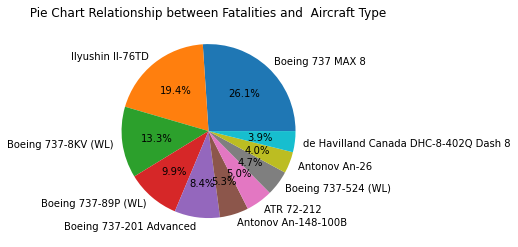

In [27]:
#pie chart proportion of the first 10 aircraft type and the fatalities rate
top_fatalities = fatalities_by_type.sort_values(ascending=False).head(10)

plt.figure()
top_fatalities.plot(kind="pie", autopct="%1.1f%%")
plt.title(" Pie Chart Relationship between Fatalities and  Aircraft Type ")
plt.ylabel("")
plt.show()




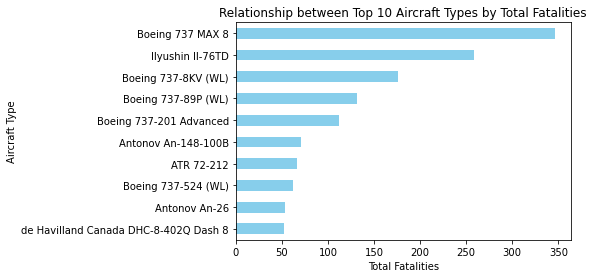

In [28]:
#horizontal bar graph of relationship between fatalities and the type of aircraft
top_fatalities.plot(kind='barh', color='skyblue')
plt.xlabel("Total Fatalities")
plt.ylabel("Aircraft Type")
plt.title("Relationship between Top 10 Aircraft Types by Total Fatalities")
plt.gca().invert_yaxis()  #  largest at top
plt.show()



INSIGHT 1

When fatalities are summarized by aircraft type, some aircraft types have
very low total fatality counts compared to others in the dataset.

sample of Aircraft with highest fatality rate are ;

aircraft_type                         (Fatalities)

Boeing 737 MAX 8                         (346),
Ilyushin Il-76TD                         (258),
Boeing 737-8KV (WL)                      (176),
Boeing 737-89P (WL)                      (132),
Boeing 737-201 Advanced                  (112),
Antonov An-148-100B                      (71),
ATR 72-212                               (66),

These are the aircraft_type that the investors should avoid since they have a high risk rate 

sample of Aircraft with lowest fatality rate are ;

aircraft_type                (Fatalities)

Dassault Falcon 2000EX        (0),
Dassault Falcon 20D           (0),
Dassault Falcon 7X            (0),
Dassault Falcon 900B          (0),
Dassault Falcon 900EX         (0),
Dassault Falcon 900EX EASy    (0),
Dornier 228-101               (0),
Dornier 228-201               (0),
Dornier 228-202               (0),
ATR 42-300                    (0),

These are the aircraft_type that the investors should consider purchasing  since they have a lower risk rate due to low rate of fatalities


In [29]:
#data analysis 2
#Accident Frequency by Aircraft Type
accident_counts_by_type = df["aircraft_type"].value_counts().sort_values(ascending=False)

accident_counts_by_type.head(10)



Cessna 208B Grand Caravan                   57
Antonov An-2R                               29
Beechcraft 200 Super King Air               29
de Havilland Canada DHC-6 Twin Otter 300    17
Cessna 208 Caravan I                        15
de Havilland Canada DHC-8-402Q Dash 8       14
Antonov An-2                                13
Learjet 35A                                 13
British Aerospace BAe-125-700A              12
Cessna 208B Supervan 900                    12
Name: aircraft_type, dtype: int64

In [30]:
accident_counts_by_type.tail(10)

Douglas C-118A Liftmaster (DC-6A)    1
Boeing 767-232 (BDSF)                1
Antonov An-72                        1
Boeing 747-4D7                       1
Embraer ERJ-145EP                    1
Boeing 777-232ER                     1
Beechcraft 99                        1
Beechcraft 300 Super King Air 350    1
British Aerospace BAe-146-200        1
Douglas C-47B (DC-3)                 1
Name: aircraft_type, dtype: int64

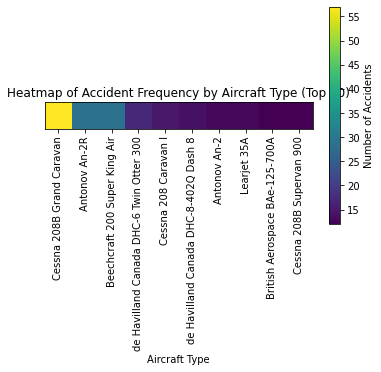

In [31]:
#heat map of the top 10 accident frequency by aircraft type
top_10_accidents = accident_counts_by_type.head(10)

heatmap_data = top_10_accidents.to_numpy(dtype=float).reshape(1, -1)

plt.figure()
plt.imshow(heatmap_data)
plt.colorbar(label="Number of Accidents")
plt.yticks([])
plt.xticks(
    ticks=np.arange(len(top_10_accidents.index)),
    labels=top_10_accidents.index,
    rotation=90
)
plt.title("Heatmap of Accident Frequency by Aircraft Type (Top 10)")
plt.xlabel("Aircraft Type")
plt.show()




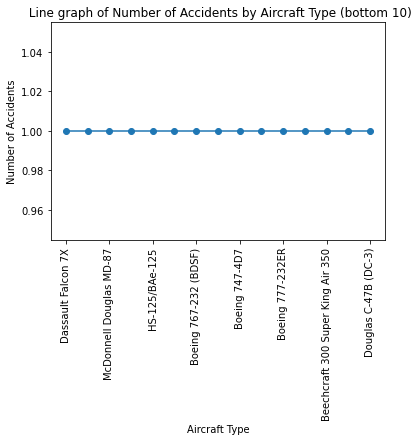

In [32]:
# line graph of  aircraft type with least number of accidents (bottom 10)

bottom_10_accidents = accident_counts_by_type.tail(15)

plt.figure()
bottom_10_accidents.plot(kind="line", marker="o")
plt.title(" Line graph of Number of Accidents by Aircraft Type (bottom 10)")
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.show()




INSIGHT 2

The rate of accidents recorded over different aircrafts differs with some
types which occur less frequently in accidents.

These are the sample of  type of aircraft that has a higher accident occurrence of which the investors should not consider purchasing 

    Aircraft_type                         accident occurrence
Cessna 208B Grand Caravan                   (57),
Beechcraft 200 Super King Air               (29),
Antonov An-2R                               (29),
de Havilland Canada DHC-6 Twin Otter 300    (17),
Cessna 208 Caravan I                        (15),
de Havilland Canada DHC-8-402Q Dash 8       (14),
Antonov An-2                                (13),
Learjet 35A                                 (13),
Boeing 737-8AS (WL)                         (12),
Cessna 208B Supervan 900                    (12),

These are the sample of  type of aircraft that has a lower accident occurrence of which the investors should  consider purchasing 

Aircraft_type                 accident occurence
Grumman G-1159 Gulfstream II    (1),
Boeing 777-3F2ER                (1),
Curtiss C-46F-1-CU Commando     (1),
Boeing 757-223                  (1),
Boeing 737-800                  (1),
Dassault Falcon 900EX EASy      (1),
McDonnell Douglas MD-11F        (1),
Boeing 737-275C Adv.            (1),
Beechcraft 100 King Air         (1),
Lockheed WC-130H Hercules       (1),



The company should prioritize aircraft types with fewer recorded accidents
to reduce exposure to operational incidents.







In [33]:
#data analysis 3
#Damage Severity Distribution

damage_distribution = df["damage"].value_counts()

damage_distribution


sub    663
w/o    351
non    169
min     49
unk     15
mis      1
Name: damage, dtype: int64

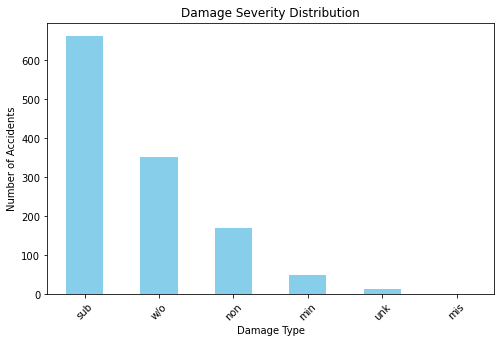

In [34]:
# Creating a bar chart of number of accidents  by the damage type
damage_distribution.plot(kind='bar', color='skyblue', figsize=(8,5))

# Adding labels and title
plt.xlabel("Damage Type")
plt.ylabel("Number of Accidents")
plt.title("Damage Severity Distribution")
plt.xticks(rotation=45)
plt.show()





INSIGHT  3

Most accidents fall into damage categories that do not indicate complete aircraft loss, while fewer accidents result in more severe damage outcomes.

The company should focus on aircraft types and operating conditions associated
with lower damage severity to limit repair costs and asset loss.



In [35]:
#data analysis 4
#damage severity by aircraft_type

In [36]:
damage_by_aircraft_type = (
    df.groupby(["aircraft_type", "damage"])
    .size()
    .sort_values(ascending=False)
)

damage_by_aircraft_type.head(15)


aircraft_type                                   damage
Cessna 208B Grand Caravan                       sub       30
                                                w/o       22
Antonov An-2R                                   sub       16
Beechcraft 200 Super King Air                   w/o       14
Antonov An-2R                                   w/o       13
Beechcraft 200 Super King Air                   sub       13
de Havilland Canada DHC-6 Twin Otter 300        sub       11
Cessna 208 Caravan I                            sub       10
Cessna 208B Supervan 900                        sub       10
de Havilland Canada DHC-8-402Q Dash 8           sub        9
Antonov An-2T                                   sub        8
British Aerospace BAe-125-700A                  w/o        8
de Havilland Canada DHC-3T Vazar Turbine Otter  sub        8
Boeing 737-8AS (WL)                             non        8
Antonov An-26                                   w/o        7
dtype: int64

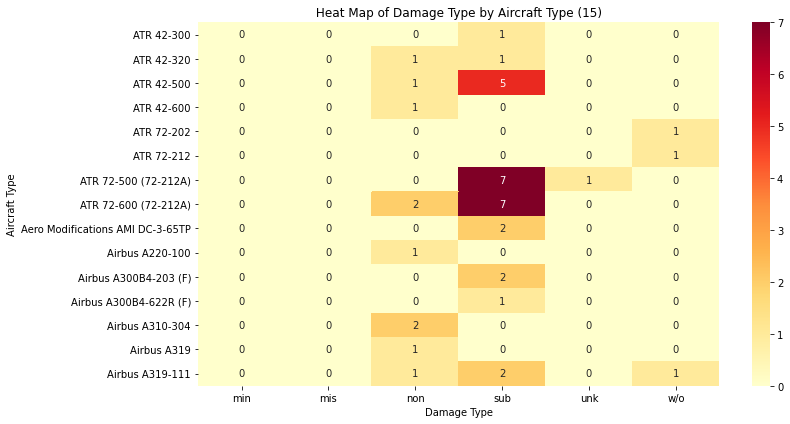

In [37]:
#heat map of damage type by (top 15) aircraft
damage_df = damage_by_aircraft_type.reset_index(name='count')

# Pivot so damage types become columns
damage_pivot = damage_df.pivot(index='aircraft_type', columns='damage', values='count').fillna(0).head(15)

plt.figure(figsize=(12,6))
sns.heatmap(damage_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title(" Heat Map of Damage Type by Aircraft Type (15) ")
plt.xlabel("Damage Type")
plt.ylabel("Aircraft Type")
plt.tight_layout()
plt.show()

INSIGHT 4

When the aircraft type summarizes the severity of the damage, certain aircraft types emerge.
more often among the larger damage categories, and others more often
related to less damaging results. This denotes damage variations distribution of severity across aircrafts.

The company should prioritize aircraft types that are more frequently associated with lower damage severity categories to reduce repair costs andasset loss.






5. DATA ANALYSIS INSIGHTS AND RECOMMENDATION

-Fatalities by Aircraft Type

The categorization of fatalities by aircraft type indicates a significant variation in the risk of aircrafts.

The Boeing 737 MAX 8 (346 deaths) and Ilyushin Il-76TD (258 deaths) aircrafts are the ones that have the highest number of fatalities thus being involved in more serious accidents.

Conversely, the aircrafts such as Dassault Falcon 2000EX, Dornier 228-101, and ATR 42-300 have zero fatalities and this means low risk profile.

Insight: To reduce the chances of passengers and crew fatalities, investors or operators should think of aircraft types that have low fatalities in the past. Planes that have a large number of fatalities could be characterized by greater risk of operation.

-Accident Frequency by Aircraft.

There is a high frequency of accidents with certain types of aircraft, e.g., Cessna 208B Grand Caravan (57 accidents) and Beechcraft 200 Super King Air (29 accidents).

There are other aircraft (like Grumman G-1159 Gulfstream II and Boeing 757-223) which are represented by one flight in the dataset.

Knowledge: The frequency of accidents in different aircrafts is highly different. Planes that record more accidents might be more prone to the operational risk when compared to those with minimal accidents. To curb the number of accidents, companies ought to focus on aircrafts that have low incidences of accidents.

-Distribution of damage.

In all accidents, the majority of them are in the substantial (sub) and written-off (w/o) category; minor damage or no damage is less common.

Counts: Substantial (663), Written-off (351), None (169), Minor (49).

Insight: Most accidents are associated with a lot of damage, which brings out the concern related to the costs of repair or complete loss. By concentrating on airplanes and the conditions under which the damages are less severe, the financial consequences and asset preservation will be minimized.

-Damage Intensity by Aircraft Type.

Some categories of aircraft, including the Cessna 208B Grand Caravan and Antonov An-2R, are overrepresented in the severe damages categories (substantial and written-off).

Other type of aircrafts have more incidents in minor or no damage groups, which are less risky.

The appearance of heatmaps or stacked bar charts shows that there is a certain tendency to such aircraft: certain types are always followed by an increased amount of damage, and others are less dangerous.

Intuition: Aircrafts that have lower severity of damage in history should first be invested or operated because they are the aircrafts that would have lesser cost of repair and asset loss. In contrast, the types that are often engaged in the serious destruction should be closely observed or avoided to minimize the financial and operation risks.

RECOMMENDATION

There is no equal distribution of fatalities, accidents, and the severity of damages in the aircraft types.

High risk planes: Boeing 737 MAX 8, Ilyushin Il-76TD, Antonov An-2R, Cessna 208B Grand Caravan - these are the models with high death tolls, accidents or extreme damage.

Less dangerous aircraft: Dassault Falcon series, Dornier 228 series, ATR 42-300 of the type indicate zero or less fatalities and low accident rate with minimal damage.

Strategic Advice: The companies and investors are advised to lay emphasis on aircraft with fewer fatalities, fewer incidences of accidents, and less damage intensity to minimize operational, financial, and safety hazards.

  Summary
  
Through death data, accident rates, and the severity of damage, the data set can help understand which aircraft models are riskier and which are less risky, leading to informed decisions based on data about which aircraft to choose and how to operate more safely.
